In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import networkx as nx

import matplotlib as mpl
from matplotlib import colors

from griottes.graphmaker import make_spheroids
from griottes.graphmaker import graph_generation_func
from griottes.graphplotter import graph_plot
from griottes.graphplotter import graph_plot
import griottes


# Read files with cell types

We extract the single cell data provided by earlier analysis.

In [4]:
pos_qNSC =  r'170218_gfapgfp_qNSC_RefFrame_Detailed.csv'
pos_aNP = r'170218_gfapgfp_aNP_RefFrame_Detailed.csv'
pos_aNPsing = r'170218_gfapgfp_aNP_singlet_RefFrame_Detailed.csv'
pos_aNSC= r'170218_gfapgfp_aNSC_RefFrame_Detailed.csv'
pos_aNSCsing = r'170218_gfapgfp_aNSC_singlet_RefFrame_Detailed.csv'

In [5]:
position_qNSC = pandas.read_csv(pos_qNSC, 
                                delimiter =',', 
                                header = [2])
position_aNP = pandas.read_csv(pos_aNP, 
                               delimiter =',', 
                               header = [2])
position_aNPsing = pandas.read_csv(pos_aNPsing, 
                                   delimiter =',', 
                                   header = [2])
position_aNSC = pandas.read_csv(pos_aNSC, 
                                delimiter =',', 
                                header = [2])
position_aNSCsing = pandas.read_csv(pos_aNSCsing, 
                                    delimiter =',', 
                                    header = [2])

In [6]:
position_qNSC.columns = [['x', 'y','z','Unit','Category','Collection','Reference_frame','Time','ID','Other']]
position_aNP.columns = [['x', 'y','z','Unit','Category','Collection','Reference_frame','Time','ID','Other']]
position_aNPsing.columns = [['x', 'y','z','Unit','Category','Collection','Reference_frame','Time','ID','Other']]
position_aNSC.columns = [['x', 'y','z','Unit','Category','Collection','Reference_frame','Time','ID','Other']]
position_aNSCsing.columns = [['x', 'y','z','Unit','Category','Collection','Reference_frame','Time','ID','Other']]

position_qNSC['cell_type'] = 0
position_qNSC['cell_properties'] = 'GFAP+ ,PCNA-'

position_aNP['cell_type'] = 1
position_aNP['cell_properties'] = 'GFAP+ ,PCNA+'

position_aNPsing['cell_type'] = 1
position_aNPsing['cell_properties'] = 'GFAP+ ,PCNA+'

position_aNSC['cell_type'] = 2
position_aNSC['cell_properties'] = 'GFAP- ,PCNA+'

position_aNSCsing['cell_type'] = 2
position_aNSCsing['cell_properties'] = 'GFAP- ,PCNA+'

data_frames = [position_aNP, position_qNSC, position_aNPsing, position_aNSC]
df = position_aNSCsing.append(data_frames)

new_prop = pandas.DataFrame()

new_prop['x'] = df['x'].values.reshape(1,-1)[0]
new_prop['y'] = df['y'].values.reshape(1,-1)[0]
new_prop['z'] = df['z'].values.reshape(1,-1)[0]
new_prop['cell_type'] = df['cell_type'].values.reshape(1,-1)[0]
new_prop['cell_properties'] = df['cell_properties'].values.reshape(1,-1)[0]

new_prop['label'] = np.array([i for i in range(0,len(new_prop))])
new_prop.index = [i for i in range(len(new_prop))]

n_colors = len(new_prop.cell_type.unique())
cmap = discrete_cmap(n_colors, base_cmap='YlOrBr')
color_list = np.array([cmap(i) for i in range(n_colors)])

colors = []
for i in range(len(np.array(new_prop.cell_type))):
    colors.append(tuple(color_list[np.array(new_prop.cell_type)][i]))
color_list[np.array(new_prop.cell_type)]

new_prop['color'] = colors

new_prop['legend'] = new_prop['cell_properties']

# Create Voronoi network

We have prepared `new_prop`, the dataframe containing the relevant single-cell data information. It is provided as an input to `griottes` which then generates a Delaunay network. 

In [7]:
descriptors = ['label', 'cell_type', 'color', 'legend', 'x', 'y', 'z','cell_properties']

In [8]:
G = graph_generation_func.generate_delaunay_graph(new_prop, 
                                                 descriptors = descriptors, 
                                                 dCells = 35,
                                                 flat_image = True)

The generated network can be visualised using specific network visualisation tools:

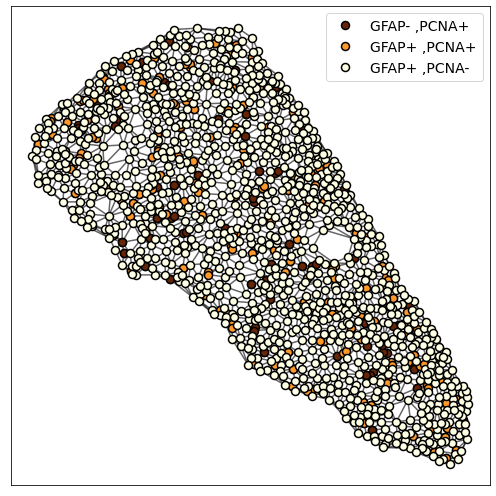

In [9]:
graph_plot.network_plot_2D(G,
                alpha_line = 0.6,
                scatterpoint_size = 8,
                legend = True,
                legend_fontsize = 14,
                figsize = (7,7))

plt.tight_layout()